In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn import preprocessing
#from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor

#from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
d1 = pd.read_csv('OrdinalDrop1.csv')
d1.shape

(2579, 83)

In [3]:
d1 = d1.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
d1.shape

(2579, 80)

In [4]:
X = d1.drop(['SalePrice'], axis=1)
y = d1.SalePrice

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.25)

In [6]:
len(X.columns)

79

In [7]:
X.shape

(2579, 79)

In [8]:
gbm = GradientBoostingRegressor()

In [9]:
gbm.fit(X_train, Y_train)

GradientBoostingRegressor()

In [10]:
gbm.score(X_test, Y_test)

0.9182183502447255

In [11]:
gbm_results_train = gbm.predict(X_train)

In [12]:
gbm_results_test = gbm.predict(X_test)

In [13]:
X_train_gbm = X_train.assign(GBM = gbm_results_train)
X_train_gbm

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,GBM
1026,11.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,6.0,2.0,2.0,0.0,5.0,1.0,0.0,11.0,12.0,2.0,3.0,4.0,0.0,1.0,5.0,3.0,3.0,6.0,1.0,2.0,1.0,4.0,4.0,6.0,2.0,5.0,3.0,1.0,5.0,2.0,3.0,4.0,1.0,9.0,0.0,9.0,4.0,1802,54.0,7588,7,6,1920,1950,0.0,352.0,0.0,441.0,793.0,901,901,0,0.0,0.0,1,1,4,1,9,1,1920.000000,1.0,216.0,0,0,40,0,0,0,0,183946.980911
1618,15.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,15.0,2.0,2.0,2.0,2.0,1.0,0.0,3.0,11.0,2.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,5.0,1.0,0.0,1.0,4.0,6.0,3.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,3.0,9.0,4.0,1040,60.0,7200,4,5,1949,1950,0.0,0.0,0.0,0.0,0.0,1040,0,0,0.0,0.0,2,0,2,2,6,0,1956.000000,2.0,420.0,0,0,0,0,0,0,0,94822.967839
602,5.0,5.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,19.0,2.0,2.0,0.0,2.0,3.0,0.0,12.0,13.0,2.0,0.0,4.0,2.0,0.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,4.0,0.0,6.0,2.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,3.0,9.0,4.0,1808,102.0,13514,9,5,2008,2008,285.0,1142.0,0.0,632.0,1774.0,1808,0,0,1.0,0.0,2,0,3,1,7,1,2008.000000,3.0,850.0,200,26,0,0,0,0,0,342101.236965
1317,5.0,6.0,1.0,1.0,0.0,1.0,0.0,4.0,0.0,20.0,1.0,7.0,0.0,2.0,1.0,0.0,8.0,8.0,2.0,3.0,2.0,1.0,5.0,5.0,3.0,3.0,5.0,1.0,4.0,1.0,4.0,4.0,6.0,3.0,5.0,2.0,5.0,5.0,2.0,3.0,2.0,1.0,8.0,2.0,9.0,4.0,825,49.0,8235,5,7,1955,1995,0.0,180.0,645.0,0.0,825.0,825,0,0,1.0,0.0,1,0,2,1,4,0,1963.000000,2.0,720.0,140,50,0,0,0,0,0,123257.565607
846,9.0,5.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0,26.0,2.0,2.0,0.0,0.0,1.0,0.0,6.0,6.0,1.0,2.0,2.0,1.0,2.0,5.0,2.0,3.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,6.0,1.0,9.0,4.0,1717,44.0,13758,7,5,1990,1991,117.0,902.0,0.0,254.0,1156.0,1187,530,0,0.0,0.0,2,1,3,1,7,1,1990.000000,2.0,400.0,168,36,0,0,0,0,0,197719.203032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,10.0,5.0,1.0,1.0,1.0,3.0,0.0,1.0,0.0,18.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,5.0,3.0,6.0,6.0,1.0,2.0,1.0,4.0,4.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0,9.0,4.0,1839,58.0,16770,7,5,1998,1998,30.0,0.0,0.0,1195.0,1195.0,1195,644,0,0.0,0.0,2,1,4,1,7,0,1998.000000,2.0,486.0,0,81,0,0,0,0,0,196154.339919
1579,13.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,7.0,1.0,0.0,6.0,6.0,1.0,2.0,4.0,1.0,2.0,2.0,0.0,2.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,3.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,2.0,2.0,9.0,4.0,985,65.0,8385,5,8,1977,1977,220.0,595.0,0.0,390.0,985.0,985,0,0,0.0,0.0,2,0,3,1,6,0,1977.000000,1.0,328.0,210,0,0,0,0,0,0,148009.676508
1742,9.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,0.0,0.0,1.0,0.0,8.0,8.0,2.0,3.0,2.0,3.0,3.0,3.0,4.0,4.0,4.0,1.0,2.0,1.0,4.0,4.0,2.0,3.0,6.0,1.0,3.0,3.0,2.0,3.0,4.0,1.0,6.0,2.0,9.0,4.0,1137,57.0,8050,5,8,1947,1993,0.0,0.0,0.0,0.0,0.0,929,208,0,0.0,0.0,1,1,4,1,8,0,1976.982048,0.0,0.0,0,0,0,0,0,0,0,110941.455213
1411,0.0,5.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,19.0,2.0,2.0,3.0,2.0,1.0,0.0,12.0,13.0,3.0,2.0,4.0,2.0,2.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,2.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,9.0,3.0,9.0,4.0,1314,34.0,5001,7,5,2007,2

In [14]:
X_test_gbm = X_test.assign(GBM = gbm_results_test)
X_test_gbm

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,GBM
1066,6.0,6.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,20.0,2.0,2.0,0.0,2.0,3.0,0.0,8.0,8.0,2.0,3.0,4.0,2.0,5.0,5.0,3.0,0.0,6.0,1.0,2.0,1.0,0.0,1.0,6.0,3.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,9.0,1.0,9.0,4.0,960,50.000000,6000,4,4,1920,1950,0.0,250.0,0.0,710.0,960.0,960,0,0,0.0,0.0,1,0,2,1,5,0,1997.0,1.0,308.0,0,0,168,0,0,0,0,87697.715336
2543,11.0,6.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,20.0,2.0,2.0,0.0,5.0,2.0,0.0,8.0,8.0,2.0,3.0,0.0,0.0,5.0,5.0,3.0,5.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,2.0,5.0,3.0,5.0,5.0,0.0,3.0,4.0,1.0,1.0,2.0,9.0,4.0,1378,60.000000,9600,7,9,1928,2005,0.0,141.0,0.0,548.0,689.0,689,689,0,0.0,0.0,2,0,3,1,7,1,1928.0,2.0,360.0,0,0,116,0,0,0,0,150921.593466
573,10.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,18.0,2.0,2.0,0.0,5.0,3.0,0.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,3.0,0.0,9.0,4.0,2526,92.000000,10120,8,5,1994,1994,391.0,740.0,0.0,425.0,1165.0,1203,1323,0,1.0,0.0,2,1,4,1,8,1,1994.0,3.0,844.0,309,78,0,0,0,0,0,322900.229826
1080,9.0,6.0,1.0,0.0,3.0,3.0,0.0,4.0,0.0,20.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,3.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,3.0,5.0,3.0,5.0,5.0,2.0,3.0,3.0,1.0,6.0,3.0,9.0,4.0,1284,50.000000,3500,5,7,1947,1950,0.0,312.0,0.0,408.0,720.0,720,564,0,0.0,0.0,1,1,2,1,5,0,1948.0,1.0,240.0,0,35,0,0,0,0,0,116608.777603
1984,5.0,5.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,22.0,2.0,2.0,0.0,2.0,3.0,0.0,13.0,14.0,1.0,3.0,4.0,1.0,5.0,5.0,3.0,5.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,3.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,1.0,1.0,9.0,4.0,988,68.516053,9945,5,5,1961,1961,57.0,827.0,0.0,161.0,988.0,988,0,0,1.0,0.0,1,0,3,1,5,0,1963.0,2.0,572.0,0,0,0,0,0,0,0,123415.466884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749,0.0,6.0,1.0,1.0,3.0,2.0,0.0,4.0,1.0,13.0,2.0,2.0,3.0,2.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,2.0,5.0,1.0,2.0,6.0,1.0,0.0,1.0,4.0,4.0,6.0,4.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,7.0,4.0,9.0,4.0,945,31.000000,2394,5,6,1973,1973,0.0,915.0,0.0,30.0,945.0,945,0,0,1.0,1.0,1,0,2,1,5,1,1973.0,1.0,253.0,174,0,56,0,108,0,0,126265.010402
95,13.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,15.0,2.0,2.0,0.0,7.0,3.0,0.0,13.0,14.0,1.0,3.0,4.0,1.0,5.0,5.0,0.0,1.0,5.0,1.0,0.0,1.0,4.0,4.0,6.0,5.0,2.0,2.0,5.0,5.0,2.0,3.0,2.0,1.0,4.0,0.0,9.0,4.0,1370,125.000000,10000,5,6,1956,1956,272.0,678.0,281.0,99.0,1058.0,1370,0,0,1.0,0.0,1,0,3,1,6,1,1956.0,1.0,300.0,191,0,0,0,120,0,0,147410.796911
728,10.0,5.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0,19.0,2.0,2.0,0.0,5.0,1.0,0.0,8.0,8.0,1.0,2.0,4.0,2.0,0.0,5.0,1.0,6.0,6.0,1.0,0.0,1.0,4.0,0.0,6.0,0.0,3.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,7.0,1.0,9.0,4.0,2758,118.000000,13654,9,5,2005,2006,365.0,0.0,0.0,1704.0,1704.0,1722,1036,0,0.0,0.0,2,1,4,1,9,1,2005.0,3.0,814.0,282,55,0,0,0,0,0,368918.613624
1682,13.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,15.0,2.0,2.0,0.0,7.0,1.0,0.0,6.0,6.0,1.0,3.0,4.0,1.0,5.0,5.0,0.0,0.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,2.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,0.0,9.0,4.0,1146,

In [15]:
Y_train

1026    200100
1618     90000
602     324000
1317    125000
846     187500
         ...  
1346    221000
1579    149900
1742     96000
1411    230000
2546    120000
Name: SalePrice, Length: 1934, dtype: int64

In [16]:
X_train_full = X_train_gbm.assign(SalePrice = Y_train)
X_train_full

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,GBM,SalePrice
1026,11.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,6.0,2.0,2.0,0.0,5.0,1.0,0.0,11.0,12.0,2.0,3.0,4.0,0.0,1.0,5.0,3.0,3.0,6.0,1.0,2.0,1.0,4.0,4.0,6.0,2.0,5.0,3.0,1.0,5.0,2.0,3.0,4.0,1.0,9.0,0.0,9.0,4.0,1802,54.0,7588,7,6,1920,1950,0.0,352.0,0.0,441.0,793.0,901,901,0,0.0,0.0,1,1,4,1,9,1,1920.000000,1.0,216.0,0,0,40,0,0,0,0,183946.980911,200100
1618,15.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,15.0,2.0,2.0,2.0,2.0,1.0,0.0,3.0,11.0,2.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,5.0,1.0,0.0,1.0,4.0,6.0,3.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,3.0,9.0,4.0,1040,60.0,7200,4,5,1949,1950,0.0,0.0,0.0,0.0,0.0,1040,0,0,0.0,0.0,2,0,2,2,6,0,1956.000000,2.0,420.0,0,0,0,0,0,0,0,94822.967839,90000
602,5.0,5.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,19.0,2.0,2.0,0.0,2.0,3.0,0.0,12.0,13.0,2.0,0.0,4.0,2.0,0.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,4.0,0.0,6.0,2.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,3.0,9.0,4.0,1808,102.0,13514,9,5,2008,2008,285.0,1142.0,0.0,632.0,1774.0,1808,0,0,1.0,0.0,2,0,3,1,7,1,2008.000000,3.0,850.0,200,26,0,0,0,0,0,342101.236965,324000
1317,5.0,6.0,1.0,1.0,0.0,1.0,0.0,4.0,0.0,20.0,1.0,7.0,0.0,2.0,1.0,0.0,8.0,8.0,2.0,3.0,2.0,1.0,5.0,5.0,3.0,3.0,5.0,1.0,4.0,1.0,4.0,4.0,6.0,3.0,5.0,2.0,5.0,5.0,2.0,3.0,2.0,1.0,8.0,2.0,9.0,4.0,825,49.0,8235,5,7,1955,1995,0.0,180.0,645.0,0.0,825.0,825,0,0,1.0,0.0,1,0,2,1,4,0,1963.000000,2.0,720.0,140,50,0,0,0,0,0,123257.565607,125000
846,9.0,5.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0,26.0,2.0,2.0,0.0,0.0,1.0,0.0,6.0,6.0,1.0,2.0,2.0,1.0,2.0,5.0,2.0,3.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,6.0,1.0,9.0,4.0,1717,44.0,13758,7,5,1990,1991,117.0,902.0,0.0,254.0,1156.0,1187,530,0,0.0,0.0,2,1,3,1,7,1,1990.000000,2.0,400.0,168,36,0,0,0,0,0,197719.203032,187500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,10.0,5.0,1.0,1.0,1.0,3.0,0.0,1.0,0.0,18.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,5.0,3.0,6.0,6.0,1.0,2.0,1.0,4.0,4.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0,9.0,4.0,1839,58.0,16770,7,5,1998,1998,30.0,0.0,0.0,1195.0,1195.0,1195,644,0,0.0,0.0,2,1,4,1,7,0,1998.000000,2.0,486.0,0,81,0,0,0,0,0,196154.339919,221000
1579,13.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,7.0,1.0,0.0,6.0,6.0,1.0,2.0,4.0,1.0,2.0,2.0,0.0,2.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,3.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,2.0,2.0,9.0,4.0,985,65.0,8385,5,8,1977,1977,220.0,595.0,0.0,390.0,985.0,985,0,0,0.0,0.0,2,0,3,1,6,0,1977.000000,1.0,328.0,210,0,0,0,0,0,0,148009.676508,149900
1742,9.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,0.0,0.0,1.0,0.0,8.0,8.0,2.0,3.0,2.0,3.0,3.0,3.0,4.0,4.0,4.0,1.0,2.0,1.0,4.0,4.0,2.0,3.0,6.0,1.0,3.0,3.0,2.0,3.0,4.0,1.0,6.0,2.0,9.0,4.0,1137,57.0,8050,5,8,1947,1993,0.0,0.0,0.0,0.0,0.0,929,208,0,0.0,0.0,1,1,4,1,8,0,1976.982048,0.0,0.0,0,0,0,0,0,0,0,110941.455213,96000
1411,0.0,5.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,19.0,2.0,2.0,3.0,2.0,1.0,0.0,12.0,13.0,3.0,2.0,4.0,2.0,2.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,2.0,1.0,2

In [17]:
X_test_full = X_test_gbm.assign(SalePrice = Y_test)
X_test_full

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,GBM,SalePrice
1066,6.0,6.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,20.0,2.0,2.0,0.0,2.0,3.0,0.0,8.0,8.0,2.0,3.0,4.0,2.0,5.0,5.0,3.0,0.0,6.0,1.0,2.0,1.0,0.0,1.0,6.0,3.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,9.0,1.0,9.0,4.0,960,50.000000,6000,4,4,1920,1950,0.0,250.0,0.0,710.0,960.0,960,0,0,0.0,0.0,1,0,2,1,5,0,1997.0,1.0,308.0,0,0,168,0,0,0,0,87697.715336,108500
2543,11.0,6.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,20.0,2.0,2.0,0.0,5.0,2.0,0.0,8.0,8.0,2.0,3.0,0.0,0.0,5.0,5.0,3.0,5.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,2.0,5.0,3.0,5.0,5.0,0.0,3.0,4.0,1.0,1.0,2.0,9.0,4.0,1378,60.000000,9600,7,9,1928,2005,0.0,141.0,0.0,548.0,689.0,689,689,0,0.0,0.0,2,0,3,1,7,1,1928.0,2.0,360.0,0,0,116,0,0,0,0,150921.593466,161000
573,10.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,18.0,2.0,2.0,0.0,5.0,3.0,0.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,3.0,0.0,9.0,4.0,2526,92.000000,10120,8,5,1994,1994,391.0,740.0,0.0,425.0,1165.0,1203,1323,0,1.0,0.0,2,1,4,1,8,1,1994.0,3.0,844.0,309,78,0,0,0,0,0,322900.229826,290000
1080,9.0,6.0,1.0,0.0,3.0,3.0,0.0,4.0,0.0,20.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,3.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,3.0,5.0,3.0,5.0,5.0,2.0,3.0,3.0,1.0,6.0,3.0,9.0,4.0,1284,50.000000,3500,5,7,1947,1950,0.0,312.0,0.0,408.0,720.0,720,564,0,0.0,0.0,1,1,2,1,5,0,1948.0,1.0,240.0,0,35,0,0,0,0,0,116608.777603,110000
1984,5.0,5.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,22.0,2.0,2.0,0.0,2.0,3.0,0.0,13.0,14.0,1.0,3.0,4.0,1.0,5.0,5.0,3.0,5.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,3.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,1.0,1.0,9.0,4.0,988,68.516053,9945,5,5,1961,1961,57.0,827.0,0.0,161.0,988.0,988,0,0,1.0,0.0,1,0,3,1,5,0,1963.0,2.0,572.0,0,0,0,0,0,0,0,123415.466884,128500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749,0.0,6.0,1.0,1.0,3.0,2.0,0.0,4.0,1.0,13.0,2.0,2.0,3.0,2.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,2.0,5.0,1.0,2.0,6.0,1.0,0.0,1.0,4.0,4.0,6.0,4.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,7.0,4.0,9.0,4.0,945,31.000000,2394,5,6,1973,1973,0.0,915.0,0.0,30.0,945.0,945,0,0,1.0,1.0,1,0,2,1,5,1,1973.0,1.0,253.0,174,0,56,0,108,0,0,126265.010402,119500
95,13.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,15.0,2.0,2.0,0.0,7.0,3.0,0.0,13.0,14.0,1.0,3.0,4.0,1.0,5.0,5.0,0.0,1.0,5.0,1.0,0.0,1.0,4.0,4.0,6.0,5.0,2.0,2.0,5.0,5.0,2.0,3.0,2.0,1.0,4.0,0.0,9.0,4.0,1370,125.000000,10000,5,6,1956,1956,272.0,678.0,281.0,99.0,1058.0,1370,0,0,1.0,0.0,1,0,3,1,6,1,1956.0,1.0,300.0,191,0,0,0,120,0,0,147410.796911,148000
728,10.0,5.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0,19.0,2.0,2.0,0.0,5.0,1.0,0.0,8.0,8.0,1.0,2.0,4.0,2.0,0.0,5.0,1.0,6.0,6.0,1.0,0.0,1.0,4.0,0.0,6.0,0.0,3.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,7.0,1.0,9.0,4.0,2758,118.000000,13654,9,5,2005,2006,365.0,0.0,0.0,1704.0,1704.0,1722,1036,0,0.0,0.0,2,1,4,1,9,1,2005.0,3.0,814.0,282,55,0,0,0,0,0,368918.613624,418000
1682,13.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,15.0,2.0,2.0,0.0,7.0,1.0,0.0,6.0,6.0,1.0,3.0,4.0,1.0,5.0,5.0,0.0,0.0,6.0,1.0,4.0,1.0

In [18]:
combo = pd.concat([X_train_full, X_test_full], axis=0)
combo

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,GBM,SalePrice
1026,11.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,6.0,2.0,2.0,0.0,5.0,1.0,0.0,11.0,12.0,2.0,3.0,4.0,0.0,1.0,5.0,3.0,3.0,6.0,1.0,2.0,1.0,4.0,4.0,6.0,2.0,5.0,3.0,1.0,5.0,2.0,3.0,4.0,1.0,9.0,0.0,9.0,4.0,1802,54.0,7588,7,6,1920,1950,0.0,352.0,0.0,441.0,793.0,901,901,0,0.0,0.0,1,1,4,1,9,1,1920.0,1.0,216.0,0,0,40,0,0,0,0,183946.980911,200100
1618,15.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,15.0,2.0,2.0,2.0,2.0,1.0,0.0,3.0,11.0,2.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,5.0,1.0,0.0,1.0,4.0,6.0,3.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,3.0,9.0,4.0,1040,60.0,7200,4,5,1949,1950,0.0,0.0,0.0,0.0,0.0,1040,0,0,0.0,0.0,2,0,2,2,6,0,1956.0,2.0,420.0,0,0,0,0,0,0,0,94822.967839,90000
602,5.0,5.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,19.0,2.0,2.0,0.0,2.0,3.0,0.0,12.0,13.0,2.0,0.0,4.0,2.0,0.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,4.0,0.0,6.0,2.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,3.0,9.0,4.0,1808,102.0,13514,9,5,2008,2008,285.0,1142.0,0.0,632.0,1774.0,1808,0,0,1.0,0.0,2,0,3,1,7,1,2008.0,3.0,850.0,200,26,0,0,0,0,0,342101.236965,324000
1317,5.0,6.0,1.0,1.0,0.0,1.0,0.0,4.0,0.0,20.0,1.0,7.0,0.0,2.0,1.0,0.0,8.0,8.0,2.0,3.0,2.0,1.0,5.0,5.0,3.0,3.0,5.0,1.0,4.0,1.0,4.0,4.0,6.0,3.0,5.0,2.0,5.0,5.0,2.0,3.0,2.0,1.0,8.0,2.0,9.0,4.0,825,49.0,8235,5,7,1955,1995,0.0,180.0,645.0,0.0,825.0,825,0,0,1.0,0.0,1,0,2,1,4,0,1963.0,2.0,720.0,140,50,0,0,0,0,0,123257.565607,125000
846,9.0,5.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0,26.0,2.0,2.0,0.0,0.0,1.0,0.0,6.0,6.0,1.0,2.0,2.0,1.0,2.0,5.0,2.0,3.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,6.0,1.0,9.0,4.0,1717,44.0,13758,7,5,1990,1991,117.0,902.0,0.0,254.0,1156.0,1187,530,0,0.0,0.0,2,1,3,1,7,1,1990.0,2.0,400.0,168,36,0,0,0,0,0,197719.203032,187500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749,0.0,6.0,1.0,1.0,3.0,2.0,0.0,4.0,1.0,13.0,2.0,2.0,3.0,2.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,2.0,5.0,1.0,2.0,6.0,1.0,0.0,1.0,4.0,4.0,6.0,4.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,7.0,4.0,9.0,4.0,945,31.0,2394,5,6,1973,1973,0.0,915.0,0.0,30.0,945.0,945,0,0,1.0,1.0,1,0,2,1,5,1,1973.0,1.0,253.0,174,0,56,0,108,0,0,126265.010402,119500
95,13.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,15.0,2.0,2.0,0.0,7.0,3.0,0.0,13.0,14.0,1.0,3.0,4.0,1.0,5.0,5.0,0.0,1.0,5.0,1.0,0.0,1.0,4.0,4.0,6.0,5.0,2.0,2.0,5.0,5.0,2.0,3.0,2.0,1.0,4.0,0.0,9.0,4.0,1370,125.0,10000,5,6,1956,1956,272.0,678.0,281.0,99.0,1058.0,1370,0,0,1.0,0.0,1,0,3,1,6,1,1956.0,1.0,300.0,191,0,0,0,120,0,0,147410.796911,148000
728,10.0,5.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0,19.0,2.0,2.0,0.0,5.0,1.0,0.0,8.0,8.0,1.0,2.0,4.0,2.0,0.0,5.0,1.0,6.0,6.0,1.0,0.0,1.0,4.0,0.0,6.0,0.0,3.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,7.0,1.0,9.0,4.0,2758,118.0,13654,9,5,2005,2006,365.0,0.0,0.0,1704.0,1704.0,1722,1036,0,0.0,0.0,2,1,4,1,9,1,2005.0,3.0,814.0,282,55,0,0,0,0,0,368918.613624,418000
1682,13.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,15.0,2.0,2.0,0.0,7.0,1.0,0.0,6.0,6.0,1.0,3.0,4.0,1.0,5.0,5.0,0.0,0.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,2.0,1.0,3.0,5.0,5.0,2.0,3.0,

In [19]:
X_cat = combo.drop(['SalePrice'], axis=1)
y_cat = combo.SalePrice

In [20]:
CB = CatBoostRegressor()

In [21]:
scoring = {'r2': 'r2',
           'neg_mae': 'neg_mean_absolute_error',
          }

In [22]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, scoring=scoring, 
                                  cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [23]:
dfs = evaluate_model(CB, X_cat, y_cat)

Learning rate set to 0.045906
0:	learn: 72410.2255861	total: 67ms	remaining: 1m 6s
1:	learn: 69796.6579107	total: 69.4ms	remaining: 34.6s
2:	learn: 67643.2833213	total: 72.4ms	remaining: 24.1s
3:	learn: 65339.6527728	total: 75ms	remaining: 18.7s
4:	learn: 63328.5572481	total: 76.5ms	remaining: 15.2s
5:	learn: 61146.2197498	total: 78ms	remaining: 12.9s
6:	learn: 59028.2144001	total: 80.8ms	remaining: 11.5s
7:	learn: 57097.0757359	total: 83.2ms	remaining: 10.3s
8:	learn: 55259.6659813	total: 84.9ms	remaining: 9.35s
9:	learn: 53538.1843362	total: 86.4ms	remaining: 8.55s
10:	learn: 51995.2915792	total: 87.7ms	remaining: 7.89s
11:	learn: 50330.5423740	total: 88.9ms	remaining: 7.32s
12:	learn: 48915.9040782	total: 90.2ms	remaining: 6.85s
13:	learn: 47218.0706444	total: 91.6ms	remaining: 6.45s
14:	learn: 45748.8798459	total: 93.6ms	remaining: 6.15s
15:	learn: 44253.6919620	total: 97.1ms	remaining: 5.97s
16:	learn: 42982.1631412	total: 100ms	remaining: 5.78s
17:	learn: 41628.6172352	total: 103

Learning rate set to 0.045906
0:	learn: 73394.5868142	total: 65.7ms	remaining: 1m 5s
1:	learn: 70786.4276107	total: 69.6ms	remaining: 34.8s
2:	learn: 68567.1008158	total: 75.5ms	remaining: 25.1s
3:	learn: 66139.7753048	total: 81.3ms	remaining: 20.2s
4:	learn: 63984.9882305	total: 87.1ms	remaining: 17.3s
5:	learn: 61824.4634686	total: 94.6ms	remaining: 15.7s
6:	learn: 59703.8685573	total: 99.3ms	remaining: 14.1s
7:	learn: 57714.3193466	total: 109ms	remaining: 13.5s
8:	learn: 55797.6593409	total: 113ms	remaining: 12.4s
9:	learn: 53974.7750204	total: 125ms	remaining: 12.4s
10:	learn: 52173.0620158	total: 132ms	remaining: 11.8s
11:	learn: 50626.0923449	total: 136ms	remaining: 11.2s
12:	learn: 49140.2243744	total: 147ms	remaining: 11.2s
13:	learn: 47895.2553641	total: 152ms	remaining: 10.7s
14:	learn: 46425.1249746	total: 156ms	remaining: 10.2s
15:	learn: 44866.0788636	total: 164ms	remaining: 10.1s
16:	learn: 43545.4792808	total: 171ms	remaining: 9.91s
17:	learn: 42230.5505414	total: 179ms	

Learning rate set to 0.045906
0:	learn: 72140.2297157	total: 64.8ms	remaining: 1m 4s
1:	learn: 69533.5092355	total: 76.5ms	remaining: 38.2s
2:	learn: 67038.2127300	total: 93.1ms	remaining: 30.9s
3:	learn: 64916.8758343	total: 101ms	remaining: 25.1s
4:	learn: 62780.1116101	total: 105ms	remaining: 20.9s
5:	learn: 60600.3712339	total: 113ms	remaining: 18.7s
6:	learn: 58499.0024802	total: 119ms	remaining: 16.8s
7:	learn: 56574.9665874	total: 136ms	remaining: 16.9s
8:	learn: 54682.4232914	total: 145ms	remaining: 16s
9:	learn: 52887.1110369	total: 150ms	remaining: 14.9s
10:	learn: 51370.3831841	total: 160ms	remaining: 14.4s
11:	learn: 49617.3762598	total: 171ms	remaining: 14.1s
12:	learn: 48174.2938121	total: 179ms	remaining: 13.6s
13:	learn: 46612.4498731	total: 188ms	remaining: 13.2s
14:	learn: 45181.4406660	total: 197ms	remaining: 12.9s
15:	learn: 43730.2589360	total: 206ms	remaining: 12.7s
16:	learn: 42434.6745773	total: 216ms	remaining: 12.5s
17:	learn: 41184.0935499	total: 224ms	remain

148:	learn: 14215.4988416	total: 908ms	remaining: 5.19s
149:	learn: 14202.4244694	total: 913ms	remaining: 5.17s
150:	learn: 14182.1663313	total: 924ms	remaining: 5.19s
151:	learn: 14167.0135031	total: 928ms	remaining: 5.17s
152:	learn: 14138.7360395	total: 933ms	remaining: 5.16s
153:	learn: 14121.3592562	total: 938ms	remaining: 5.16s
154:	learn: 14109.3327039	total: 948ms	remaining: 5.17s
155:	learn: 14096.2087673	total: 955ms	remaining: 5.17s
156:	learn: 14086.5742745	total: 962ms	remaining: 5.16s
157:	learn: 14067.9254806	total: 967ms	remaining: 5.15s
158:	learn: 14043.1758705	total: 973ms	remaining: 5.14s
159:	learn: 14035.7324474	total: 977ms	remaining: 5.13s
160:	learn: 14011.9514977	total: 982ms	remaining: 5.11s
161:	learn: 13990.8489962	total: 990ms	remaining: 5.12s
162:	learn: 13970.5597818	total: 994ms	remaining: 5.1s
163:	learn: 13960.9880365	total: 1s	remaining: 5.11s
164:	learn: 13942.1128729	total: 1.01s	remaining: 5.11s
165:	learn: 13913.2302540	total: 1.01s	remaining: 5.

148:	learn: 14854.7831481	total: 1.16s	remaining: 6.6s
149:	learn: 14822.8675333	total: 1.17s	remaining: 6.62s
150:	learn: 14789.2412578	total: 1.18s	remaining: 6.65s
151:	learn: 14767.5025034	total: 1.19s	remaining: 6.64s
152:	learn: 14728.7797552	total: 1.19s	remaining: 6.61s
153:	learn: 14706.6533933	total: 1.2s	remaining: 6.59s
154:	learn: 14685.2256623	total: 1.2s	remaining: 6.56s
155:	learn: 14663.2199917	total: 1.22s	remaining: 6.61s
156:	learn: 14635.3112048	total: 1.24s	remaining: 6.66s
157:	learn: 14625.8335671	total: 1.24s	remaining: 6.63s
158:	learn: 14614.1196336	total: 1.25s	remaining: 6.6s
159:	learn: 14591.0775494	total: 1.25s	remaining: 6.58s
160:	learn: 14578.4468498	total: 1.26s	remaining: 6.55s
161:	learn: 14554.1175413	total: 1.26s	remaining: 6.52s
162:	learn: 14532.5661130	total: 1.26s	remaining: 6.5s
163:	learn: 14524.2252116	total: 1.27s	remaining: 6.47s
164:	learn: 14513.9915915	total: 1.29s	remaining: 6.51s
165:	learn: 14493.1468169	total: 1.31s	remaining: 6.5

149:	learn: 14156.0172124	total: 1.19s	remaining: 6.77s
150:	learn: 14132.4638758	total: 1.2s	remaining: 6.75s
151:	learn: 14089.6944206	total: 1.21s	remaining: 6.72s
152:	learn: 14062.7518500	total: 1.21s	remaining: 6.69s
153:	learn: 14042.2618431	total: 1.22s	remaining: 6.71s
154:	learn: 14021.9875363	total: 1.23s	remaining: 6.69s
155:	learn: 13995.4044746	total: 1.25s	remaining: 6.75s
156:	learn: 13962.1773372	total: 1.25s	remaining: 6.73s
157:	learn: 13946.9531814	total: 1.26s	remaining: 6.7s
158:	learn: 13916.0312827	total: 1.27s	remaining: 6.71s
159:	learn: 13903.4030750	total: 1.29s	remaining: 6.76s
160:	learn: 13883.1653462	total: 1.3s	remaining: 6.77s
161:	learn: 13857.1153013	total: 1.31s	remaining: 6.79s
162:	learn: 13837.4695470	total: 1.32s	remaining: 6.8s
163:	learn: 13820.1742602	total: 1.33s	remaining: 6.79s
164:	learn: 13797.3743064	total: 1.34s	remaining: 6.78s
165:	learn: 13781.9827560	total: 1.35s	remaining: 6.77s
166:	learn: 13748.4820009	total: 1.35s	remaining: 6.

295:	learn: 12003.9714817	total: 1.89s	remaining: 4.5s
296:	learn: 11976.2414861	total: 1.91s	remaining: 4.51s
297:	learn: 11961.8561453	total: 1.92s	remaining: 4.52s
298:	learn: 11939.3790174	total: 1.92s	remaining: 4.51s
299:	learn: 11916.8826014	total: 1.93s	remaining: 4.51s
300:	learn: 11906.2373485	total: 1.95s	remaining: 4.53s
301:	learn: 11889.9076657	total: 1.97s	remaining: 4.55s
302:	learn: 11871.3385757	total: 1.98s	remaining: 4.54s
303:	learn: 11844.6673566	total: 1.98s	remaining: 4.53s
304:	learn: 11831.4880825	total: 1.99s	remaining: 4.53s
305:	learn: 11812.0542368	total: 1.99s	remaining: 4.52s
306:	learn: 11799.3403221	total: 2s	remaining: 4.52s
307:	learn: 11782.6003478	total: 2s	remaining: 4.5s
308:	learn: 11765.7890129	total: 2.01s	remaining: 4.49s
309:	learn: 11745.4889665	total: 2.02s	remaining: 4.49s
310:	learn: 11729.8477646	total: 2.02s	remaining: 4.49s
311:	learn: 11718.5985988	total: 2.03s	remaining: 4.48s
312:	learn: 11696.1324837	total: 2.04s	remaining: 4.47s


295:	learn: 11608.3401016	total: 2.08s	remaining: 4.95s
296:	learn: 11594.2204671	total: 2.08s	remaining: 4.93s
297:	learn: 11590.7947166	total: 2.09s	remaining: 4.92s
298:	learn: 11586.8418491	total: 2.09s	remaining: 4.91s
299:	learn: 11564.7203118	total: 2.12s	remaining: 4.94s
300:	learn: 11556.4269767	total: 2.12s	remaining: 4.93s
301:	learn: 11552.5185176	total: 2.13s	remaining: 4.92s
302:	learn: 11540.6734382	total: 2.13s	remaining: 4.91s
303:	learn: 11520.7672832	total: 2.14s	remaining: 4.9s
304:	learn: 11509.9036275	total: 2.15s	remaining: 4.89s
305:	learn: 11494.6338936	total: 2.15s	remaining: 4.88s
306:	learn: 11476.5102654	total: 2.16s	remaining: 4.87s
307:	learn: 11460.7322679	total: 2.16s	remaining: 4.86s
308:	learn: 11450.2698906	total: 2.17s	remaining: 4.86s
309:	learn: 11434.4410970	total: 2.18s	remaining: 4.86s
310:	learn: 11420.1919021	total: 2.19s	remaining: 4.84s
311:	learn: 11412.8472773	total: 2.19s	remaining: 4.83s
312:	learn: 11400.8146400	total: 2.2s	remaining: 

295:	learn: 11902.3356838	total: 2.26s	remaining: 5.38s
296:	learn: 11888.3113088	total: 2.26s	remaining: 5.36s
297:	learn: 11878.1722961	total: 2.27s	remaining: 5.34s
298:	learn: 11865.4339583	total: 2.28s	remaining: 5.34s
299:	learn: 11860.4050449	total: 2.29s	remaining: 5.34s
300:	learn: 11858.5644631	total: 2.3s	remaining: 5.34s
301:	learn: 11842.1395870	total: 2.31s	remaining: 5.33s
302:	learn: 11823.0046490	total: 2.32s	remaining: 5.33s
303:	learn: 11812.8356738	total: 2.32s	remaining: 5.32s
304:	learn: 11797.3870603	total: 2.33s	remaining: 5.3s
305:	learn: 11787.1897669	total: 2.34s	remaining: 5.3s
306:	learn: 11771.4327090	total: 2.34s	remaining: 5.29s
307:	learn: 11761.3639389	total: 2.35s	remaining: 5.28s
308:	learn: 11738.4859704	total: 2.36s	remaining: 5.29s
309:	learn: 11725.4672755	total: 2.37s	remaining: 5.28s
310:	learn: 11714.1188884	total: 2.38s	remaining: 5.26s
311:	learn: 11699.8460071	total: 2.38s	remaining: 5.25s
312:	learn: 11681.9333030	total: 2.38s	remaining: 5

442:	learn: 9988.5849377	total: 2.88s	remaining: 3.63s
443:	learn: 9986.6065350	total: 2.89s	remaining: 3.62s
444:	learn: 9977.1459570	total: 2.9s	remaining: 3.61s
445:	learn: 9963.5170071	total: 2.9s	remaining: 3.6s
446:	learn: 9948.8849108	total: 2.9s	remaining: 3.59s
447:	learn: 9940.3251180	total: 2.91s	remaining: 3.58s
448:	learn: 9930.5137049	total: 2.91s	remaining: 3.57s
449:	learn: 9920.8413914	total: 2.92s	remaining: 3.57s
450:	learn: 9911.7945299	total: 2.92s	remaining: 3.56s
451:	learn: 9900.6474807	total: 2.93s	remaining: 3.55s
452:	learn: 9887.9327945	total: 2.94s	remaining: 3.55s
453:	learn: 9872.9440354	total: 2.95s	remaining: 3.55s
454:	learn: 9859.1013601	total: 2.96s	remaining: 3.54s
455:	learn: 9849.4233313	total: 2.97s	remaining: 3.54s
456:	learn: 9840.5255896	total: 2.98s	remaining: 3.53s
457:	learn: 9832.2896826	total: 2.98s	remaining: 3.53s
458:	learn: 9818.9909364	total: 2.99s	remaining: 3.52s
459:	learn: 9809.5717618	total: 2.99s	remaining: 3.51s
460:	learn: 98

442:	learn: 9950.3506992	total: 3.14s	remaining: 3.95s
443:	learn: 9934.8440357	total: 3.15s	remaining: 3.94s
444:	learn: 9924.4282823	total: 3.16s	remaining: 3.94s
445:	learn: 9907.5574000	total: 3.16s	remaining: 3.93s
446:	learn: 9904.2279170	total: 3.17s	remaining: 3.92s
447:	learn: 9889.3788064	total: 3.17s	remaining: 3.91s
448:	learn: 9887.6797643	total: 3.17s	remaining: 3.9s
449:	learn: 9864.8474536	total: 3.18s	remaining: 3.89s
450:	learn: 9854.3237445	total: 3.19s	remaining: 3.88s
451:	learn: 9841.9355856	total: 3.19s	remaining: 3.87s
452:	learn: 9830.8602777	total: 3.2s	remaining: 3.86s
453:	learn: 9820.8055741	total: 3.2s	remaining: 3.85s
454:	learn: 9807.4393257	total: 3.21s	remaining: 3.85s
455:	learn: 9794.7867248	total: 3.22s	remaining: 3.85s
456:	learn: 9778.8642171	total: 3.23s	remaining: 3.84s
457:	learn: 9762.0654267	total: 3.23s	remaining: 3.83s
458:	learn: 9745.9241595	total: 3.24s	remaining: 3.82s
459:	learn: 9727.7763431	total: 3.24s	remaining: 3.81s
460:	learn: 9

442:	learn: 10174.1428077	total: 3.3s	remaining: 4.15s
443:	learn: 10166.4134065	total: 3.31s	remaining: 4.14s
444:	learn: 10152.9022948	total: 3.32s	remaining: 4.14s
445:	learn: 10136.1285420	total: 3.32s	remaining: 4.13s
446:	learn: 10123.7389766	total: 3.34s	remaining: 4.13s
447:	learn: 10123.1575169	total: 3.35s	remaining: 4.13s
448:	learn: 10122.4044421	total: 3.35s	remaining: 4.11s
449:	learn: 10121.2785711	total: 3.36s	remaining: 4.1s
450:	learn: 10112.3599195	total: 3.36s	remaining: 4.09s
451:	learn: 10100.5870513	total: 3.37s	remaining: 4.09s
452:	learn: 10088.5850401	total: 3.38s	remaining: 4.08s
453:	learn: 10080.4378598	total: 3.38s	remaining: 4.06s
454:	learn: 10070.8317813	total: 3.39s	remaining: 4.06s
455:	learn: 10053.5779309	total: 3.41s	remaining: 4.07s
456:	learn: 10034.7498060	total: 3.42s	remaining: 4.07s
457:	learn: 10028.4058974	total: 3.43s	remaining: 4.05s
458:	learn: 10020.1936040	total: 3.44s	remaining: 4.05s
459:	learn: 10011.6145091	total: 3.44s	remaining: 

592:	learn: 8736.6996049	total: 4.05s	remaining: 2.78s
593:	learn: 8729.9794837	total: 4.06s	remaining: 2.77s
594:	learn: 8718.4203325	total: 4.06s	remaining: 2.77s
595:	learn: 8708.0993403	total: 4.07s	remaining: 2.76s
596:	learn: 8701.4562718	total: 4.07s	remaining: 2.75s
597:	learn: 8688.8147293	total: 4.08s	remaining: 2.74s
598:	learn: 8687.9677157	total: 4.09s	remaining: 2.74s
599:	learn: 8682.9842072	total: 4.09s	remaining: 2.73s
600:	learn: 8669.4215313	total: 4.1s	remaining: 2.72s
601:	learn: 8662.1609119	total: 4.1s	remaining: 2.71s
602:	learn: 8648.8892464	total: 4.11s	remaining: 2.7s
603:	learn: 8639.1126865	total: 4.11s	remaining: 2.69s
604:	learn: 8634.6236440	total: 4.12s	remaining: 2.69s
605:	learn: 8626.5127646	total: 4.12s	remaining: 2.68s
606:	learn: 8611.7495397	total: 4.13s	remaining: 2.67s
607:	learn: 8602.8596520	total: 4.14s	remaining: 2.67s
608:	learn: 8600.8084121	total: 4.14s	remaining: 2.66s
609:	learn: 8593.8424944	total: 4.14s	remaining: 2.65s
610:	learn: 8

592:	learn: 8571.5502683	total: 4.14s	remaining: 2.84s
593:	learn: 8563.3260109	total: 4.15s	remaining: 2.84s
594:	learn: 8559.1727231	total: 4.17s	remaining: 2.84s
595:	learn: 8552.3595292	total: 4.18s	remaining: 2.84s
596:	learn: 8541.2670222	total: 4.2s	remaining: 2.83s
597:	learn: 8539.2696624	total: 4.2s	remaining: 2.83s
598:	learn: 8529.9088732	total: 4.21s	remaining: 2.82s
599:	learn: 8522.8740027	total: 4.22s	remaining: 2.81s
600:	learn: 8516.5160807	total: 4.23s	remaining: 2.81s
601:	learn: 8502.8593145	total: 4.23s	remaining: 2.8s
602:	learn: 8496.9286170	total: 4.24s	remaining: 2.79s
603:	learn: 8495.0801411	total: 4.24s	remaining: 2.78s
604:	learn: 8486.8951235	total: 4.25s	remaining: 2.77s
605:	learn: 8476.4574971	total: 4.25s	remaining: 2.76s
606:	learn: 8470.0074381	total: 4.26s	remaining: 2.75s
607:	learn: 8468.4444861	total: 4.26s	remaining: 2.75s
608:	learn: 8460.9467543	total: 4.27s	remaining: 2.74s
609:	learn: 8454.0889725	total: 4.29s	remaining: 2.75s
610:	learn: 8

594:	learn: 8585.4261497	total: 4.2s	remaining: 2.86s
595:	learn: 8572.9895987	total: 4.21s	remaining: 2.85s
596:	learn: 8565.0764426	total: 4.21s	remaining: 2.84s
597:	learn: 8553.5573268	total: 4.22s	remaining: 2.84s
598:	learn: 8537.7066667	total: 4.22s	remaining: 2.83s
599:	learn: 8533.0967892	total: 4.23s	remaining: 2.82s
600:	learn: 8522.0975965	total: 4.24s	remaining: 2.81s
601:	learn: 8512.0047031	total: 4.25s	remaining: 2.81s
602:	learn: 8499.4626314	total: 4.26s	remaining: 2.8s
603:	learn: 8488.1447069	total: 4.27s	remaining: 2.8s
604:	learn: 8479.1522348	total: 4.27s	remaining: 2.79s
605:	learn: 8471.1881789	total: 4.28s	remaining: 2.78s
606:	learn: 8459.9627454	total: 4.28s	remaining: 2.77s
607:	learn: 8452.7577409	total: 4.29s	remaining: 2.76s
608:	learn: 8446.9237480	total: 4.29s	remaining: 2.75s
609:	learn: 8439.7401865	total: 4.3s	remaining: 2.75s
610:	learn: 8428.0995621	total: 4.31s	remaining: 2.74s
611:	learn: 8417.5475701	total: 4.32s	remaining: 2.74s
612:	learn: 84

594:	learn: 8235.3332938	total: 4.52s	remaining: 3.08s
595:	learn: 8229.2701990	total: 4.53s	remaining: 3.07s
596:	learn: 8223.5048824	total: 4.53s	remaining: 3.06s
597:	learn: 8211.9231087	total: 4.54s	remaining: 3.05s
598:	learn: 8202.3801422	total: 4.55s	remaining: 3.04s
599:	learn: 8193.9788538	total: 4.56s	remaining: 3.04s
600:	learn: 8187.6827541	total: 4.57s	remaining: 3.03s
601:	learn: 8177.6395008	total: 4.57s	remaining: 3.02s
602:	learn: 8168.5046947	total: 4.58s	remaining: 3.01s
603:	learn: 8166.7138475	total: 4.58s	remaining: 3s
604:	learn: 8157.1746121	total: 4.59s	remaining: 3s
605:	learn: 8150.8094970	total: 4.6s	remaining: 2.99s
606:	learn: 8137.7506633	total: 4.6s	remaining: 2.98s
607:	learn: 8127.5368854	total: 4.61s	remaining: 2.97s
608:	learn: 8119.9184886	total: 4.62s	remaining: 2.96s
609:	learn: 8109.7450438	total: 4.62s	remaining: 2.96s
610:	learn: 8107.1635276	total: 4.63s	remaining: 2.95s
611:	learn: 8103.3034985	total: 4.64s	remaining: 2.94s
612:	learn: 8094.4

742:	learn: 7462.6531404	total: 5.02s	remaining: 1.74s
743:	learn: 7454.3153149	total: 5.03s	remaining: 1.73s
744:	learn: 7453.9095280	total: 5.03s	remaining: 1.72s
745:	learn: 7442.5631525	total: 5.04s	remaining: 1.72s
746:	learn: 7440.0231015	total: 5.04s	remaining: 1.71s
747:	learn: 7435.1662115	total: 5.05s	remaining: 1.7s
748:	learn: 7428.5640036	total: 5.05s	remaining: 1.69s
749:	learn: 7428.2314197	total: 5.06s	remaining: 1.69s
750:	learn: 7421.0037708	total: 5.06s	remaining: 1.68s
751:	learn: 7417.1873321	total: 5.07s	remaining: 1.67s
752:	learn: 7409.0795416	total: 5.07s	remaining: 1.66s
753:	learn: 7408.6146885	total: 5.08s	remaining: 1.66s
754:	learn: 7397.0590987	total: 5.08s	remaining: 1.65s
755:	learn: 7393.6917596	total: 5.09s	remaining: 1.64s
756:	learn: 7387.1664347	total: 5.09s	remaining: 1.63s
757:	learn: 7378.5292958	total: 5.1s	remaining: 1.63s
758:	learn: 7369.3843480	total: 5.1s	remaining: 1.62s
759:	learn: 7361.3208375	total: 5.11s	remaining: 1.61s
760:	learn: 7

743:	learn: 7559.5804534	total: 5.29s	remaining: 1.82s
744:	learn: 7555.9961627	total: 5.29s	remaining: 1.81s
745:	learn: 7548.5978938	total: 5.3s	remaining: 1.8s
746:	learn: 7542.6937972	total: 5.31s	remaining: 1.8s
747:	learn: 7537.0717573	total: 5.32s	remaining: 1.79s
748:	learn: 7529.8486369	total: 5.33s	remaining: 1.78s
749:	learn: 7521.3038966	total: 5.33s	remaining: 1.78s
750:	learn: 7516.1688485	total: 5.34s	remaining: 1.77s
751:	learn: 7509.1784532	total: 5.34s	remaining: 1.76s
752:	learn: 7503.9019725	total: 5.35s	remaining: 1.75s
753:	learn: 7497.4131931	total: 5.35s	remaining: 1.75s
754:	learn: 7490.2547275	total: 5.36s	remaining: 1.74s
755:	learn: 7482.1593385	total: 5.37s	remaining: 1.73s
756:	learn: 7477.1661596	total: 5.38s	remaining: 1.73s
757:	learn: 7468.3463165	total: 5.38s	remaining: 1.72s
758:	learn: 7464.2581904	total: 5.38s	remaining: 1.71s
759:	learn: 7453.5680214	total: 5.39s	remaining: 1.7s
760:	learn: 7446.2818651	total: 5.39s	remaining: 1.69s
761:	learn: 74

742:	learn: 7685.6128743	total: 5.46s	remaining: 1.89s
743:	learn: 7677.8830775	total: 5.46s	remaining: 1.88s
744:	learn: 7671.8388286	total: 5.47s	remaining: 1.87s
745:	learn: 7662.1167190	total: 5.47s	remaining: 1.86s
746:	learn: 7657.8686325	total: 5.48s	remaining: 1.86s
747:	learn: 7654.4210044	total: 5.49s	remaining: 1.85s
748:	learn: 7648.0616071	total: 5.5s	remaining: 1.84s
749:	learn: 7635.3012953	total: 5.5s	remaining: 1.83s
750:	learn: 7628.3904326	total: 5.52s	remaining: 1.83s
751:	learn: 7619.4868364	total: 5.52s	remaining: 1.82s
752:	learn: 7605.8004402	total: 5.53s	remaining: 1.81s
753:	learn: 7595.8454579	total: 5.54s	remaining: 1.81s
754:	learn: 7593.5718866	total: 5.54s	remaining: 1.8s
755:	learn: 7582.6276204	total: 5.55s	remaining: 1.79s
756:	learn: 7573.5474711	total: 5.56s	remaining: 1.78s
757:	learn: 7567.0478720	total: 5.57s	remaining: 1.78s
758:	learn: 7560.6514821	total: 5.57s	remaining: 1.77s
759:	learn: 7557.7264352	total: 5.58s	remaining: 1.76s
760:	learn: 7

892:	learn: 6572.3333326	total: 5.96s	remaining: 714ms
893:	learn: 6568.6813722	total: 5.97s	remaining: 708ms
894:	learn: 6563.8094677	total: 5.97s	remaining: 701ms
895:	learn: 6556.1221688	total: 5.98s	remaining: 694ms
896:	learn: 6548.6464588	total: 5.99s	remaining: 688ms
897:	learn: 6540.1850081	total: 6s	remaining: 682ms
898:	learn: 6534.0684175	total: 6.01s	remaining: 675ms
899:	learn: 6528.3818656	total: 6.02s	remaining: 669ms
900:	learn: 6522.5675018	total: 6.03s	remaining: 662ms
901:	learn: 6515.5088744	total: 6.04s	remaining: 656ms
902:	learn: 6506.2321420	total: 6.04s	remaining: 649ms
903:	learn: 6499.0064832	total: 6.05s	remaining: 643ms
904:	learn: 6491.3735969	total: 6.06s	remaining: 636ms
905:	learn: 6485.4725383	total: 6.06s	remaining: 629ms
906:	learn: 6480.9772164	total: 6.07s	remaining: 622ms
907:	learn: 6474.9596716	total: 6.07s	remaining: 615ms
908:	learn: 6474.2791423	total: 6.08s	remaining: 609ms
909:	learn: 6469.8791138	total: 6.08s	remaining: 602ms
910:	learn: 6

894:	learn: 6517.2058043	total: 6.31s	remaining: 740ms
895:	learn: 6512.2831473	total: 6.31s	remaining: 733ms
896:	learn: 6506.3880450	total: 6.32s	remaining: 726ms
897:	learn: 6506.1127687	total: 6.33s	remaining: 719ms
898:	learn: 6501.0722275	total: 6.33s	remaining: 712ms
899:	learn: 6496.6598202	total: 6.34s	remaining: 704ms
900:	learn: 6490.5315215	total: 6.34s	remaining: 697ms
901:	learn: 6487.0728110	total: 6.35s	remaining: 690ms
902:	learn: 6481.4391792	total: 6.35s	remaining: 682ms
903:	learn: 6477.4115429	total: 6.36s	remaining: 675ms
904:	learn: 6472.8271705	total: 6.36s	remaining: 668ms
905:	learn: 6467.3625501	total: 6.37s	remaining: 661ms
906:	learn: 6467.2006940	total: 6.37s	remaining: 653ms
907:	learn: 6461.2636575	total: 6.38s	remaining: 646ms
908:	learn: 6455.3757701	total: 6.38s	remaining: 639ms
909:	learn: 6447.1239719	total: 6.39s	remaining: 632ms
910:	learn: 6443.4832688	total: 6.4s	remaining: 625ms
911:	learn: 6434.8860080	total: 6.41s	remaining: 618ms
912:	learn:

892:	learn: 6650.4140742	total: 5.88s	remaining: 704ms
893:	learn: 6644.8738101	total: 5.89s	remaining: 698ms
894:	learn: 6638.2474772	total: 5.89s	remaining: 691ms
895:	learn: 6632.0564287	total: 5.89s	remaining: 684ms
896:	learn: 6629.0556257	total: 5.9s	remaining: 678ms
897:	learn: 6628.8257423	total: 5.91s	remaining: 671ms
898:	learn: 6628.6087015	total: 5.91s	remaining: 664ms
899:	learn: 6628.3992045	total: 5.92s	remaining: 658ms
900:	learn: 6619.9878440	total: 5.92s	remaining: 651ms
901:	learn: 6616.7763797	total: 5.93s	remaining: 644ms
902:	learn: 6609.5375670	total: 5.93s	remaining: 637ms
903:	learn: 6603.2766303	total: 5.94s	remaining: 631ms
904:	learn: 6597.1783723	total: 5.95s	remaining: 624ms
905:	learn: 6588.1422828	total: 5.95s	remaining: 617ms
906:	learn: 6584.8484541	total: 5.95s	remaining: 610ms
907:	learn: 6577.8866554	total: 5.96s	remaining: 604ms
908:	learn: 6569.4380086	total: 5.96s	remaining: 597ms
909:	learn: 6561.9323119	total: 5.97s	remaining: 590ms
910:	learn:

42:	learn: 22861.2538148	total: 258ms	remaining: 5.75s
43:	learn: 22505.6455085	total: 265ms	remaining: 5.77s
44:	learn: 22180.1658598	total: 274ms	remaining: 5.81s
45:	learn: 21848.7543690	total: 281ms	remaining: 5.84s
46:	learn: 21523.2157831	total: 288ms	remaining: 5.84s
47:	learn: 21217.7810684	total: 293ms	remaining: 5.81s
48:	learn: 20957.2012751	total: 298ms	remaining: 5.79s
49:	learn: 20663.1465876	total: 306ms	remaining: 5.81s
50:	learn: 20404.5698841	total: 310ms	remaining: 5.76s
51:	learn: 20164.2949295	total: 314ms	remaining: 5.72s
52:	learn: 19919.8450859	total: 319ms	remaining: 5.69s
53:	learn: 19700.3135518	total: 322ms	remaining: 5.64s
54:	learn: 19462.9176316	total: 327ms	remaining: 5.61s
55:	learn: 19248.5029659	total: 332ms	remaining: 5.59s
56:	learn: 19022.0579184	total: 335ms	remaining: 5.55s
57:	learn: 18835.9606294	total: 339ms	remaining: 5.51s
58:	learn: 18645.0504309	total: 344ms	remaining: 5.48s
59:	learn: 18479.3487906	total: 349ms	remaining: 5.47s
60:	learn:

43:	learn: 23240.4853294	total: 263ms	remaining: 5.72s
44:	learn: 22821.7141884	total: 268ms	remaining: 5.68s
45:	learn: 22490.4243570	total: 277ms	remaining: 5.74s
46:	learn: 22206.2389513	total: 283ms	remaining: 5.74s
47:	learn: 21893.8007971	total: 287ms	remaining: 5.69s
48:	learn: 21627.9639713	total: 295ms	remaining: 5.73s
49:	learn: 21359.0873156	total: 307ms	remaining: 5.83s
50:	learn: 21073.2214762	total: 314ms	remaining: 5.83s
51:	learn: 20780.8165049	total: 317ms	remaining: 5.79s
52:	learn: 20508.4596004	total: 321ms	remaining: 5.74s
53:	learn: 20255.8229896	total: 326ms	remaining: 5.7s
54:	learn: 20000.7146630	total: 330ms	remaining: 5.66s
55:	learn: 19740.7398228	total: 337ms	remaining: 5.67s
56:	learn: 19552.2501166	total: 342ms	remaining: 5.66s
57:	learn: 19391.8340297	total: 350ms	remaining: 5.68s
58:	learn: 19165.2564195	total: 355ms	remaining: 5.66s
59:	learn: 18992.6074864	total: 361ms	remaining: 5.66s
60:	learn: 18831.0497372	total: 368ms	remaining: 5.66s
61:	learn: 

41:	learn: 23707.4002146	total: 276ms	remaining: 6.3s
42:	learn: 23330.3161208	total: 280ms	remaining: 6.24s
43:	learn: 22943.0686931	total: 285ms	remaining: 6.2s
44:	learn: 22554.5182826	total: 290ms	remaining: 6.15s
45:	learn: 22201.0005320	total: 294ms	remaining: 6.1s
46:	learn: 21874.7296674	total: 297ms	remaining: 6.03s
47:	learn: 21526.3304293	total: 302ms	remaining: 5.99s
48:	learn: 21242.1765605	total: 311ms	remaining: 6.03s
49:	learn: 20943.6468693	total: 317ms	remaining: 6.01s
50:	learn: 20646.6862409	total: 320ms	remaining: 5.96s
51:	learn: 20338.1332954	total: 324ms	remaining: 5.91s
52:	learn: 20076.0848103	total: 329ms	remaining: 5.87s
53:	learn: 19850.5298559	total: 334ms	remaining: 5.84s
54:	learn: 19636.3352025	total: 338ms	remaining: 5.8s
55:	learn: 19405.7035045	total: 344ms	remaining: 5.79s
56:	learn: 19201.4211814	total: 352ms	remaining: 5.82s
57:	learn: 19019.0113631	total: 358ms	remaining: 5.82s
58:	learn: 18844.6875254	total: 364ms	remaining: 5.8s
59:	learn: 1866

41:	learn: 23126.9575354	total: 493ms	remaining: 11.3s
42:	learn: 22737.5009396	total: 508ms	remaining: 11.3s
43:	learn: 22369.2710583	total: 522ms	remaining: 11.3s
44:	learn: 22043.5998536	total: 536ms	remaining: 11.4s
45:	learn: 21723.9416772	total: 557ms	remaining: 11.5s
46:	learn: 21407.7557553	total: 570ms	remaining: 11.6s
47:	learn: 21057.4675173	total: 585ms	remaining: 11.6s
48:	learn: 20795.8742682	total: 604ms	remaining: 11.7s
49:	learn: 20518.3516612	total: 620ms	remaining: 11.8s
50:	learn: 20318.8636831	total: 639ms	remaining: 11.9s
51:	learn: 20086.8971585	total: 653ms	remaining: 11.9s
52:	learn: 19846.7934145	total: 670ms	remaining: 12s
53:	learn: 19646.0230365	total: 683ms	remaining: 12s
54:	learn: 19431.7321134	total: 698ms	remaining: 12s
55:	learn: 19222.9343807	total: 712ms	remaining: 12s
56:	learn: 19016.5244995	total: 732ms	remaining: 12.1s
57:	learn: 18832.6807609	total: 744ms	remaining: 12.1s
58:	learn: 18653.7503500	total: 759ms	remaining: 12.1s
59:	learn: 18481.5

190:	learn: 13307.8475730	total: 999ms	remaining: 4.23s
191:	learn: 13296.7247212	total: 1s	remaining: 4.22s
192:	learn: 13285.9678285	total: 1.01s	remaining: 4.21s
193:	learn: 13251.5340550	total: 1.01s	remaining: 4.2s
194:	learn: 13235.2207397	total: 1.01s	remaining: 4.19s
195:	learn: 13226.7121034	total: 1.02s	remaining: 4.18s
196:	learn: 13204.7922017	total: 1.02s	remaining: 4.17s
197:	learn: 13176.9741532	total: 1.03s	remaining: 4.18s
198:	learn: 13161.5584937	total: 1.03s	remaining: 4.17s
199:	learn: 13144.4571850	total: 1.04s	remaining: 4.17s
200:	learn: 13129.4553917	total: 1.05s	remaining: 4.16s
201:	learn: 13122.1077947	total: 1.05s	remaining: 4.16s
202:	learn: 13104.4616152	total: 1.06s	remaining: 4.16s
203:	learn: 13082.3847051	total: 1.07s	remaining: 4.18s
204:	learn: 13051.6414728	total: 1.08s	remaining: 4.19s
205:	learn: 13037.4183361	total: 1.09s	remaining: 4.2s
206:	learn: 13020.8667581	total: 1.1s	remaining: 4.21s
207:	learn: 12991.9515694	total: 1.1s	remaining: 4.2s


189:	learn: 13155.3083439	total: 1.05s	remaining: 4.47s
190:	learn: 13143.1366407	total: 1.05s	remaining: 4.46s
191:	learn: 13123.0121085	total: 1.06s	remaining: 4.45s
192:	learn: 13105.9228524	total: 1.06s	remaining: 4.46s
193:	learn: 13086.2519740	total: 1.07s	remaining: 4.44s
194:	learn: 13076.3614099	total: 1.07s	remaining: 4.43s
195:	learn: 13053.3259231	total: 1.08s	remaining: 4.42s
196:	learn: 13034.5133808	total: 1.08s	remaining: 4.41s
197:	learn: 13022.0488820	total: 1.08s	remaining: 4.39s
198:	learn: 13006.8570188	total: 1.09s	remaining: 4.39s
199:	learn: 12995.3665163	total: 1.09s	remaining: 4.38s
200:	learn: 12985.3770556	total: 1.1s	remaining: 4.37s
201:	learn: 12963.8489102	total: 1.1s	remaining: 4.36s
202:	learn: 12948.4544724	total: 1.11s	remaining: 4.34s
203:	learn: 12941.2287598	total: 1.11s	remaining: 4.33s
204:	learn: 12919.6081802	total: 1.11s	remaining: 4.32s
205:	learn: 12908.2317525	total: 1.12s	remaining: 4.31s
206:	learn: 12898.5303985	total: 1.12s	remaining: 

189:	learn: 13347.2977220	total: 1.09s	remaining: 4.65s
190:	learn: 13321.8180611	total: 1.1s	remaining: 4.66s
191:	learn: 13300.3014760	total: 1.11s	remaining: 4.66s
192:	learn: 13289.8059847	total: 1.12s	remaining: 4.68s
193:	learn: 13274.2918546	total: 1.13s	remaining: 4.69s
194:	learn: 13255.0062730	total: 1.13s	remaining: 4.68s
195:	learn: 13230.6985855	total: 1.14s	remaining: 4.68s
196:	learn: 13215.9974948	total: 1.15s	remaining: 4.68s
197:	learn: 13193.8305146	total: 1.15s	remaining: 4.67s
198:	learn: 13187.1892698	total: 1.16s	remaining: 4.67s
199:	learn: 13164.9552809	total: 1.17s	remaining: 4.68s
200:	learn: 13157.7212362	total: 1.18s	remaining: 4.68s
201:	learn: 13147.5526283	total: 1.18s	remaining: 4.68s
202:	learn: 13126.2470457	total: 1.19s	remaining: 4.67s
203:	learn: 13106.6839395	total: 1.2s	remaining: 4.67s
204:	learn: 13100.3454029	total: 1.2s	remaining: 4.66s
205:	learn: 13092.5303921	total: 1.21s	remaining: 4.66s
206:	learn: 13082.3311450	total: 1.22s	remaining: 4

635:	learn: 8368.0945073	total: 3.02s	remaining: 1.73s
636:	learn: 8358.2582734	total: 3.02s	remaining: 1.72s
637:	learn: 8348.7564667	total: 3.03s	remaining: 1.72s
638:	learn: 8340.8100424	total: 3.04s	remaining: 1.71s
639:	learn: 8334.0095349	total: 3.04s	remaining: 1.71s
640:	learn: 8325.1929735	total: 3.04s	remaining: 1.7s
641:	learn: 8319.5901171	total: 3.04s	remaining: 1.7s
642:	learn: 8310.7997621	total: 3.05s	remaining: 1.69s
643:	learn: 8305.7212316	total: 3.05s	remaining: 1.69s
644:	learn: 8299.0850303	total: 3.06s	remaining: 1.68s
645:	learn: 8291.1331453	total: 3.06s	remaining: 1.68s
646:	learn: 8280.0354037	total: 3.06s	remaining: 1.67s
647:	learn: 8267.6467008	total: 3.07s	remaining: 1.67s
648:	learn: 8258.7351982	total: 3.07s	remaining: 1.66s
649:	learn: 8252.7584382	total: 3.08s	remaining: 1.66s
650:	learn: 8245.5872650	total: 3.08s	remaining: 1.65s
651:	learn: 8244.4752735	total: 3.08s	remaining: 1.65s
652:	learn: 8239.7338468	total: 3.09s	remaining: 1.64s
653:	learn: 

336:	learn: 11361.4777942	total: 2.16s	remaining: 4.26s
337:	learn: 11347.9962158	total: 2.17s	remaining: 4.26s
338:	learn: 11343.8070863	total: 2.19s	remaining: 4.27s
339:	learn: 11327.9057080	total: 2.19s	remaining: 4.26s
340:	learn: 11317.3995785	total: 2.2s	remaining: 4.25s
341:	learn: 11311.2577057	total: 2.21s	remaining: 4.25s
342:	learn: 11308.4529339	total: 2.22s	remaining: 4.25s
343:	learn: 11296.0623897	total: 2.23s	remaining: 4.25s
344:	learn: 11280.3775031	total: 2.24s	remaining: 4.25s
345:	learn: 11260.7498506	total: 2.25s	remaining: 4.26s
346:	learn: 11256.6697991	total: 2.26s	remaining: 4.25s
347:	learn: 11249.6990538	total: 2.27s	remaining: 4.24s
348:	learn: 11246.9437069	total: 2.27s	remaining: 4.24s
349:	learn: 11234.5145283	total: 2.28s	remaining: 4.23s
350:	learn: 11225.4070519	total: 2.29s	remaining: 4.24s
351:	learn: 11207.7931299	total: 2.3s	remaining: 4.24s
352:	learn: 11195.4076362	total: 2.32s	remaining: 4.25s
353:	learn: 11185.1895760	total: 2.33s	remaining: 

336:	learn: 11250.4791995	total: 2.31s	remaining: 4.54s
337:	learn: 11230.1464271	total: 2.32s	remaining: 4.54s
338:	learn: 11228.1707140	total: 2.32s	remaining: 4.53s
339:	learn: 11209.2528589	total: 2.34s	remaining: 4.53s
340:	learn: 11203.6547042	total: 2.34s	remaining: 4.53s
341:	learn: 11190.2973532	total: 2.36s	remaining: 4.54s
342:	learn: 11177.5508556	total: 2.37s	remaining: 4.53s
343:	learn: 11160.7785648	total: 2.37s	remaining: 4.53s
344:	learn: 11136.8050142	total: 2.38s	remaining: 4.52s
345:	learn: 11125.2293979	total: 2.39s	remaining: 4.51s
346:	learn: 11115.0880675	total: 2.39s	remaining: 4.5s
347:	learn: 11095.7673506	total: 2.4s	remaining: 4.51s
348:	learn: 11088.6478292	total: 2.41s	remaining: 4.5s
349:	learn: 11074.7005733	total: 2.42s	remaining: 4.5s
350:	learn: 11072.8593503	total: 2.43s	remaining: 4.5s
351:	learn: 11071.0955472	total: 2.44s	remaining: 4.49s
352:	learn: 11059.2360160	total: 2.45s	remaining: 4.48s
353:	learn: 11042.5796623	total: 2.45s	remaining: 4.4

485:	learn: 9453.1546212	total: 3.13s	remaining: 3.31s
486:	learn: 9441.2361462	total: 3.14s	remaining: 3.31s
487:	learn: 9433.9542308	total: 3.15s	remaining: 3.3s
488:	learn: 9423.4063263	total: 3.15s	remaining: 3.3s
489:	learn: 9413.0219632	total: 3.17s	remaining: 3.29s
490:	learn: 9394.8024519	total: 3.18s	remaining: 3.29s
491:	learn: 9390.9656252	total: 3.19s	remaining: 3.29s
492:	learn: 9388.4063682	total: 3.19s	remaining: 3.28s
493:	learn: 9376.7254308	total: 3.19s	remaining: 3.27s
494:	learn: 9365.8465091	total: 3.2s	remaining: 3.26s
495:	learn: 9356.2591572	total: 3.21s	remaining: 3.26s
496:	learn: 9347.0834472	total: 3.22s	remaining: 3.26s
497:	learn: 9336.5464002	total: 3.23s	remaining: 3.25s
498:	learn: 9327.2986489	total: 3.24s	remaining: 3.25s
499:	learn: 9313.2453558	total: 3.25s	remaining: 3.25s
500:	learn: 9300.2603534	total: 3.26s	remaining: 3.24s
501:	learn: 9298.6736938	total: 3.27s	remaining: 3.24s
502:	learn: 9293.2396204	total: 3.28s	remaining: 3.24s
503:	learn: 9

485:	learn: 9515.6829187	total: 4.34s	remaining: 4.59s
486:	learn: 9499.0397087	total: 4.35s	remaining: 4.58s
487:	learn: 9486.9145926	total: 4.36s	remaining: 4.57s
488:	learn: 9474.0213067	total: 4.36s	remaining: 4.56s
489:	learn: 9471.0828428	total: 4.37s	remaining: 4.55s
490:	learn: 9459.1595794	total: 4.37s	remaining: 4.53s
491:	learn: 9441.9624719	total: 4.38s	remaining: 4.53s
492:	learn: 9428.3030755	total: 4.39s	remaining: 4.51s
493:	learn: 9413.7972704	total: 4.4s	remaining: 4.5s
494:	learn: 9403.4213898	total: 4.4s	remaining: 4.49s
495:	learn: 9389.1623634	total: 4.41s	remaining: 4.48s
496:	learn: 9388.2253069	total: 4.41s	remaining: 4.46s
497:	learn: 9377.7531603	total: 4.41s	remaining: 4.45s
498:	learn: 9376.7221838	total: 4.42s	remaining: 4.43s
499:	learn: 9364.0553682	total: 4.42s	remaining: 4.42s
500:	learn: 9353.1826067	total: 4.43s	remaining: 4.42s
501:	learn: 9342.4212485	total: 4.44s	remaining: 4.4s
502:	learn: 9329.6605420	total: 4.45s	remaining: 4.39s
503:	learn: 93

635:	learn: 8173.4290550	total: 4.35s	remaining: 2.49s
636:	learn: 8159.1638959	total: 4.35s	remaining: 2.48s
637:	learn: 8147.2079705	total: 4.36s	remaining: 2.47s
638:	learn: 8146.1368399	total: 4.36s	remaining: 2.46s
639:	learn: 8136.0153176	total: 4.37s	remaining: 2.46s
640:	learn: 8127.0872377	total: 4.39s	remaining: 2.46s
641:	learn: 8120.6291233	total: 4.41s	remaining: 2.46s
642:	learn: 8113.2545431	total: 4.42s	remaining: 2.45s
643:	learn: 8103.2160275	total: 4.42s	remaining: 2.44s
644:	learn: 8095.4253587	total: 4.43s	remaining: 2.44s
645:	learn: 8094.9872579	total: 4.44s	remaining: 2.43s
646:	learn: 8079.6572382	total: 4.45s	remaining: 2.43s
647:	learn: 8075.8600295	total: 4.46s	remaining: 2.42s
648:	learn: 8067.2383949	total: 4.47s	remaining: 2.42s
649:	learn: 8062.3361514	total: 4.48s	remaining: 2.41s
650:	learn: 8056.1320977	total: 4.49s	remaining: 2.41s
651:	learn: 8055.7386460	total: 4.5s	remaining: 2.4s
652:	learn: 8050.6794873	total: 4.52s	remaining: 2.4s
653:	learn: 8

635:	learn: 8169.7806486	total: 5.48s	remaining: 3.14s
636:	learn: 8160.7390219	total: 5.49s	remaining: 3.13s
637:	learn: 8160.3402937	total: 5.49s	remaining: 3.12s
638:	learn: 8151.9295775	total: 5.5s	remaining: 3.1s
639:	learn: 8142.4609338	total: 5.5s	remaining: 3.09s
640:	learn: 8131.9831876	total: 5.51s	remaining: 3.08s
641:	learn: 8125.8780425	total: 5.52s	remaining: 3.08s
642:	learn: 8125.3814492	total: 5.53s	remaining: 3.07s
643:	learn: 8120.7906802	total: 5.53s	remaining: 3.06s
644:	learn: 8107.9173138	total: 5.53s	remaining: 3.04s
645:	learn: 8100.8183874	total: 5.54s	remaining: 3.04s
646:	learn: 8094.6682529	total: 5.54s	remaining: 3.02s
647:	learn: 8086.7918040	total: 5.55s	remaining: 3.01s
648:	learn: 8071.3780451	total: 5.55s	remaining: 3s
649:	learn: 8057.0659583	total: 5.56s	remaining: 2.99s
650:	learn: 8050.6032337	total: 5.56s	remaining: 2.98s
651:	learn: 8039.3965074	total: 5.57s	remaining: 2.97s
652:	learn: 8030.0418391	total: 5.57s	remaining: 2.96s
653:	learn: 8022

In [24]:
cat_df = dfs[['test_r2', 'test_neg_mae']]
cat_df = cat_df.assign(MAE = cat_df['test_neg_mae'].abs())
cat_df = cat_df.rename(columns = {'test_r2':'Cat R2', 'MAE':'Cat MAE'})
cat_df

,Cat R2,test_neg_mae,Cat MAE
0,0.958403,-9896.037729,9896.037729
1,0.952014,-11122.327919,11122.327919
2,0.946794,-10084.345537,10084.345537
3,0.933449,-12209.030447,12209.030447
4,0.959724,-10568.099039,10568.099039
5,0.958986,-10456.980894,10456.980894
6,0.949531,-11104.841454,11104.841454
7,0.947046,-10834.830000,10834.830000
8,0.931529,-11178.279017,11178.279017
9,0.948879,-10892.109187,10892.109187


In [25]:
cat_df.describe()

,Cat R2,test_neg_mae,Cat MAE
count,15.000000,15.000000,15.000000
mean,0.948706,-10844.377281,10844.377281
std,0.009287,669.380311,669.380311
min,0.931529,-12209.030447,9896.037729
25%,0.945939,-11198.303319,10279.810136
50%,0.948809,-10892.109187,10892.109187
75%,0.955208,-10279.810136,11198.303319
max,0.963465,-9896.037729,12209.030447


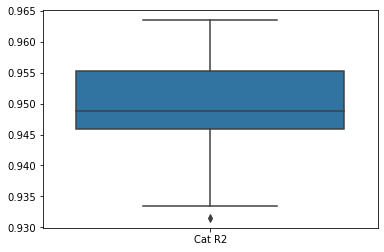

In [26]:
sns.boxplot(data=cat_df[['Cat R2']]);

In [27]:
X_trainCB, X_testCB, Y_trainCB, Y_testCB = train_test_split(X_cat,y_cat,test_size=0.25)
    
CB.fit(X_trainCB, Y_trainCB, verbose=False)
y_pred = CB.predict(X_testCB)

CB_Score = r2_score(Y_testCB, y_pred)
CB_Score

0.9491774103365682

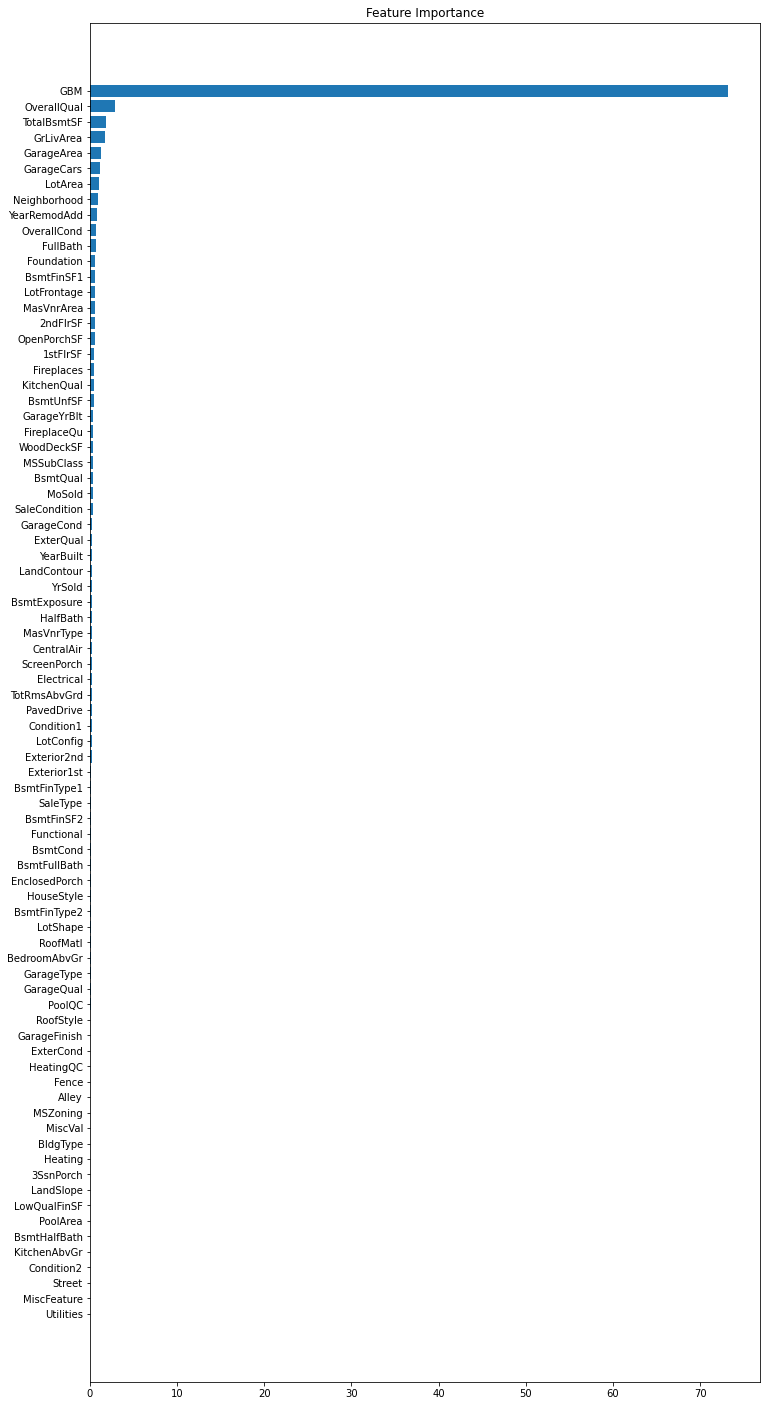

In [28]:
feature_importance = CB.feature_importances_
sorted_idx = np.argsort(feature_importance)

fig = plt.figure(figsize=(12, 25))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_testCB.columns)[sorted_idx])
plt.title('Feature Importance');

In [29]:
X_cols = combo.drop(['SalePrice'], axis=1).columns
sorted_importance = sorted(zip(X_cols, CB.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance

[('GBM', 73.15863702469547),
 ('OverallQual', 2.8501447070439143),
 ('TotalBsmtSF', 1.8410019465164298),
 ('GrLivArea', 1.7407267643400992),
 ('GarageArea', 1.2915194077863603),
 ('GarageCars', 1.1637855959944194),
 ('LotArea', 1.0272992201643898),
 ('Neighborhood', 0.9079779643991772),
 ('YearRemodAdd', 0.7735461259597941),
 ('OverallCond', 0.6908897411176401),
 ('FullBath', 0.6548200965053749),
 ('Foundation', 0.6142651133124514),
 ('BsmtFinSF1', 0.6069127243655791),
 ('LotFrontage', 0.5718590177356614),
 ('MasVnrArea', 0.5452440202897018),
 ('2ndFlrSF', 0.5404814822164965),
 ('OpenPorchSF', 0.5345199138927937),
 ('1stFlrSF', 0.5187734284192255),
 ('Fireplaces', 0.47948376594996683),
 ('KitchenQual', 0.44843746309272986),
 ('BsmtUnfSF', 0.43217643797121535),
 ('GarageYrBlt', 0.3956819912345178),
 ('FireplaceQu', 0.3922108086997728),
 ('WoodDeckSF', 0.3476679702374605),
 ('MSSubClass', 0.3397972813964078),
 ('BsmtQual', 0.3290116000960614),
 ('MoSold', 0.30005426824582526),
 ('SaleCon